<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/practica_oscilador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Corresponde al cap 1 del documento Ondas de Depine que esta
en Mega en el dir animaciones_oscilaciones

In [4]:
#Primera celda de mi primer cuaderno Colab
# Curso de F2 , 2 do cuatrimestre virtual 2020
import numpy as np # numpy = Numerical Python
import matplotlib . pyplot as plt # graficos
plt . style . use ( 'bmh') # estilo
figsize = (12 , 5) # 12 x5 pulgadas
dpi = 600 # Resolucion de figura

In [6]:
# segunda celda de mi primer cuaderno Colab
# Curso de F2 , 2 do cuatrimestre virtual 2020
g = 9.81 # m / s ^2
L = 25 # m
m = 40 # kg
def approx (t , theta0 ):
  """ para evaluar el resultado analitico aproximado
  """
  return theta0 * np . cos ( t *( g / L ) **.5)

def RHS ( theta , w , dt ) :
  """ devuelve el lado derecho de la
  ec . dif . ordinaria (1.6)
  """
  dw = - np . sin ( theta ) * dt * g / L
  dtheta = w* dt
  return dtheta , dw

def euler_step ( theta , w , dt ) :
  """ avanza un paso del algoritmo de Euler """
  dtheta , dw = RHS ( theta , w , dt )
  w = w + dw
  theta = theta + dtheta
  return theta , w

def euler_method ( theta0 , w0 , dt , n ) :
  """ Integra Euler en 0 <= t <= T ( intervalo ) """
  theta = ( n + 1) *[0]
  w = ( n + 1) *[0]
  theta [0] = theta0
  w [0] = w0
  for i in range ( n ):
    theta [ i + 1] , w [ i + 1] = \
    euler_step ( theta [ i ] , w [ i ] , dt )
  return theta , w

In [7]:
# tercera celda de mi primer cuaderno Colab
# Curso de F2 , 2 do cuatrimestre virtual 2020
theta01 = np . pi /12
theta02 = np . pi /3
T = 20
n = 10000
t = np . linspace (0 , T , n + 1)
dt = T/ float ( n )
theta1 , w1 = euler_method ( theta01 , 0 , dt , n )
theta2 , w2 = euler_method ( theta02 , 0 , dt , n )

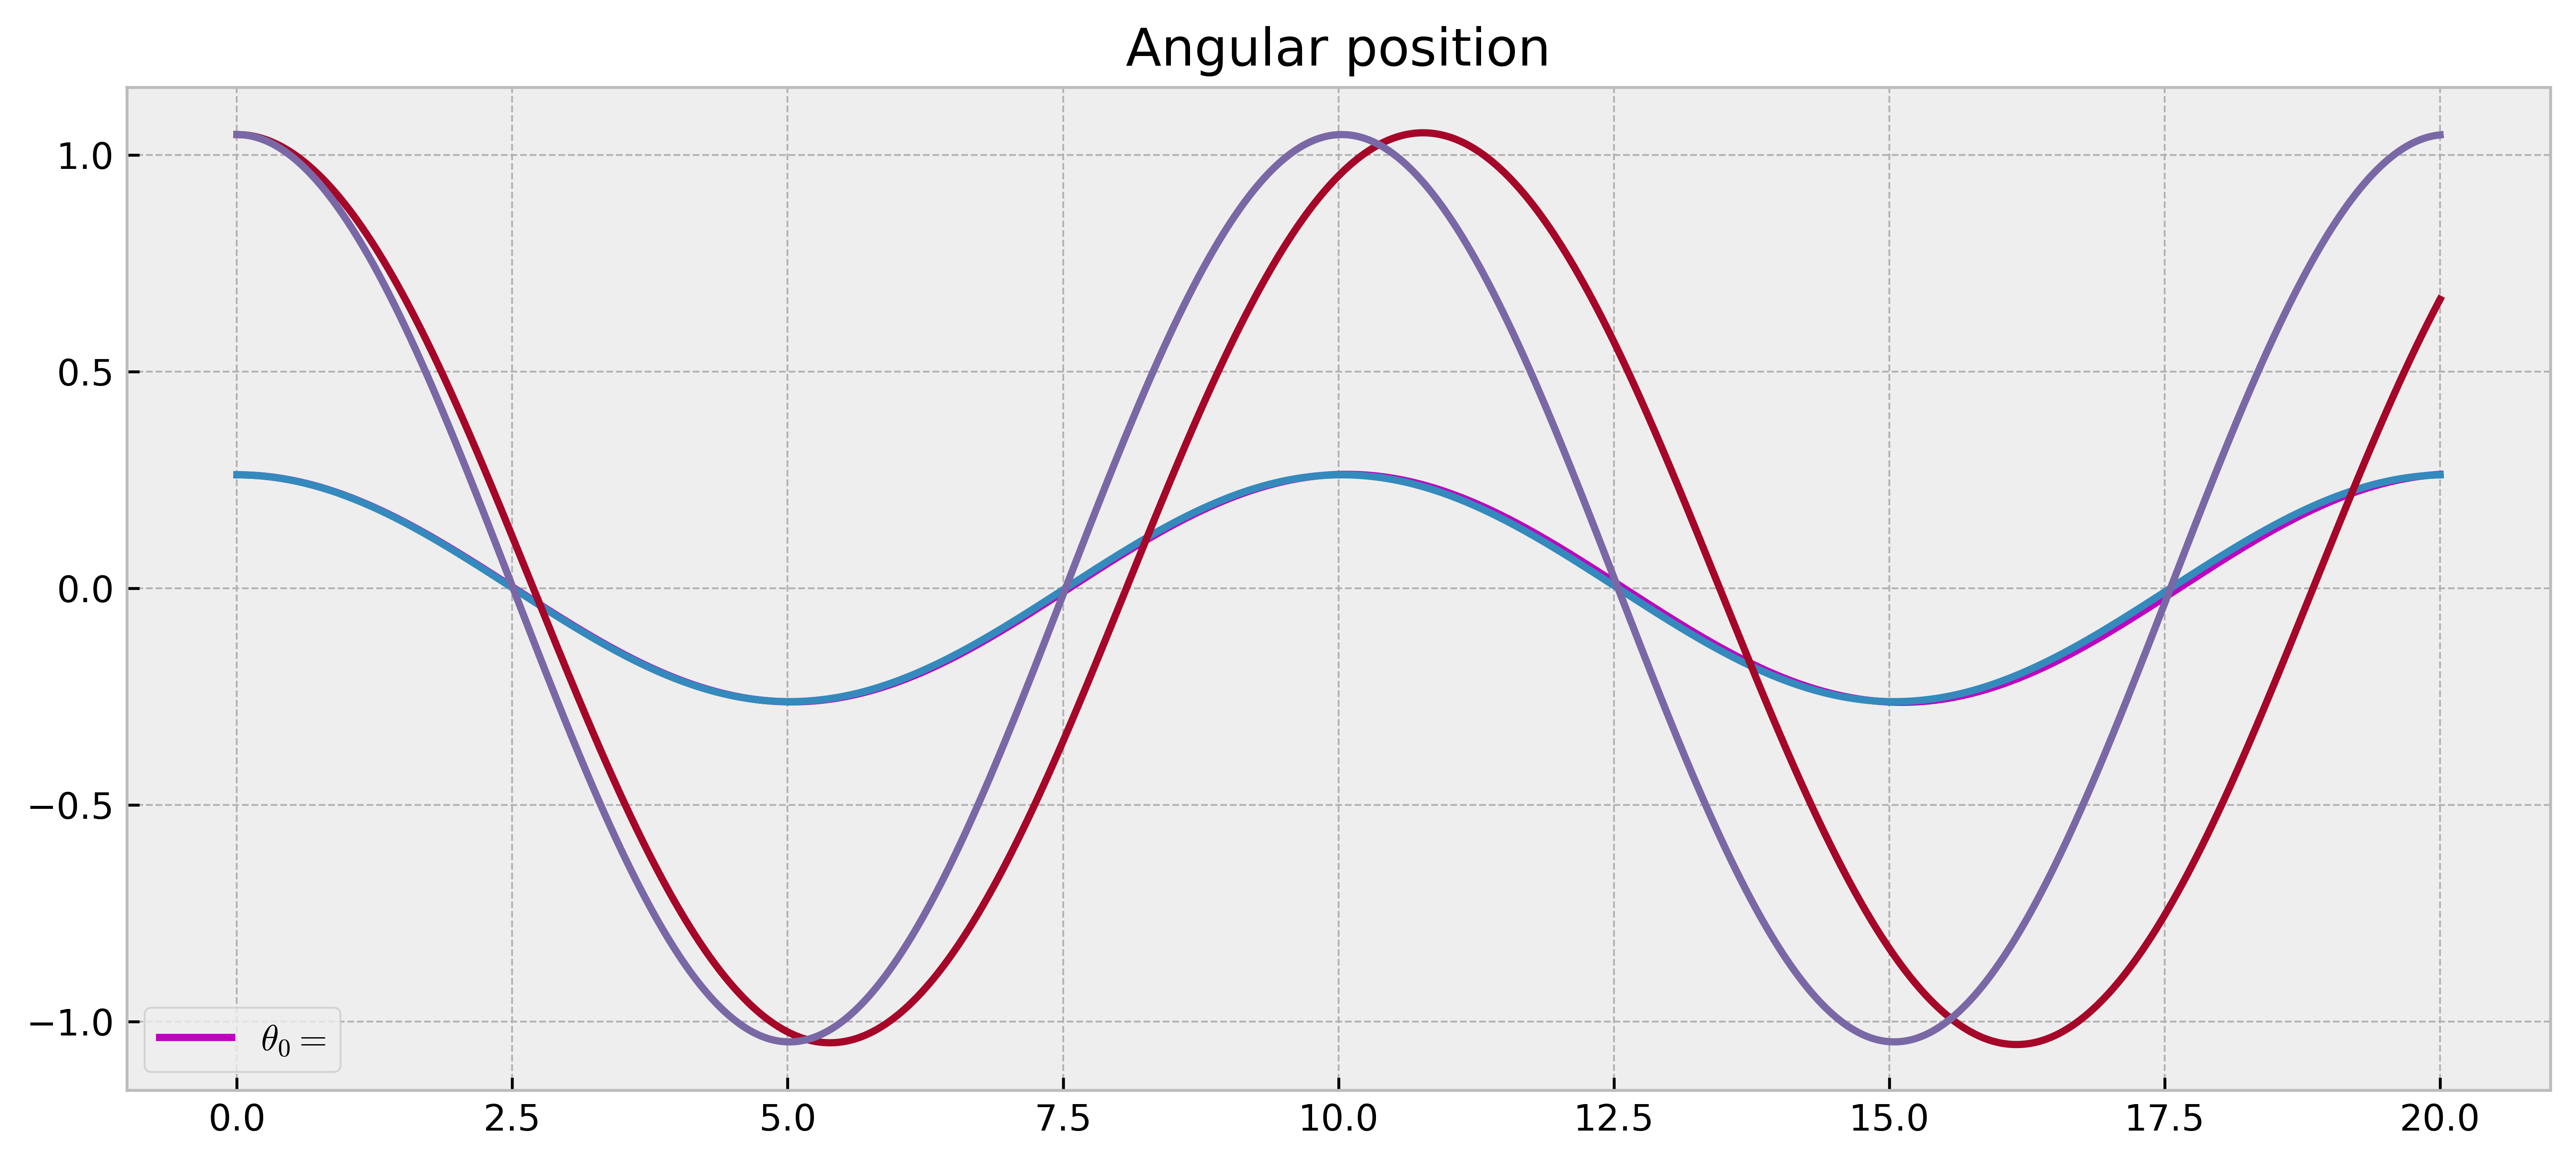

In [31]:
# cuarta celda de mi primer cuaderno Colab
# Curso de F2 , 2 do cuatrimestre virtual 2020
plt . figure ( figsize = figsize , dpi = dpi )
plt . title ( " Angular position " )
plt.plot(t , theta1 ,'m', label= r'$\theta_0 = %.0 f^\circ$')
#, "m",label = r "$\theta_0 = %.0 f ^\circ$ " %(
#theta01 *180/ np . pi ) )
plt.plot(t , approx (t , theta01 )) # , 'm - - ' , label = r 'Aproximado')
plt . plot (t , theta2 ) #, "g " , label = r " $ \ theta_0 = %.0 f ^\ circ$ " %(
#theta02 *180/ np . pi ) )
plt.plot (t , approx (t , theta02 )) #, "g - - " , label = r " Aproximado" )
#plt . xlabel ( r " $t$ , [ s ] " )
#plt . ylabel ( r " $ \ theta ( t )$ , [ rad ] " )
plt . legend ()
plt . show ()